Your job is to perform an analysis of the MINIST data set. You will start by performing the following analysis:
Make sure to discuss the performance of your classifier on both the training and test sets.
NOTE: Make sure to make lots of pictures.
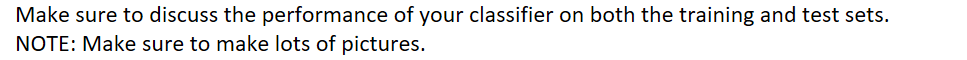
I. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector
and each column of your data matrix is a different image.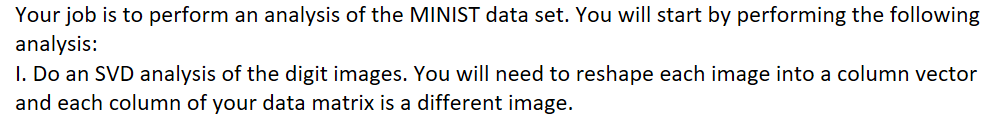x

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract image and label data
X = mnist.data
y = mnist.target

# Reshape image data into column vectors
X = X.T

# Perform SVD analysis
svd = TruncatedSVD(n_components=10, random_state=42)
X_svd = svd.fit_transform(X)

# Print the explained variance ratios
print("Explained variance ratios:", svd.explained_variance_ratio_)


C:\Users\TestTwo\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Explained variance ratios: [0.32261436 0.05885139 0.05157976 0.04413124 0.03810623 0.03080292
 0.026163   0.02099349 0.02059146 0.01694801]


2. What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Plot the singular value spectrum
U, s, Vt = np.linalg.svd(X)
plt.plot(s)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.show()

# Determine the rank of the digit space
r = np.sum(s > 1e-10)
print('Rank of the digit space:', r)

# Truncate the singular values
X_trunc = U[:, :r] @ np.diag(s[:r]) @ Vt[:r, :]

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_trunc, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred, average='weighted')
train_rec = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print('Training Set Accuracy:', train_acc)
print('Training Set Precision:', train_prec)
print('Training Set Recall:', train_rec)
print('Training Set F1 Score:', train_f1)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='weighted')
test_rec = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print('Test Set Accuracy:', test_acc)
print('Test Set Precision:', test_prec)
print('Test Set Recall:', test_rec)
print('Test Set F1 Score:', test_f1)


C:\Users\TestTwo\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MemoryError: Unable to allocate 36.5 GiB for an array with shape (70000, 70000) and data type float64

In [ ]:
3. What is the interpretation of the U, E, and V matrices?

C:\Users\TestTwo\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\TestTwo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9360892857142857
Test accuracy: 0.9178571428571428


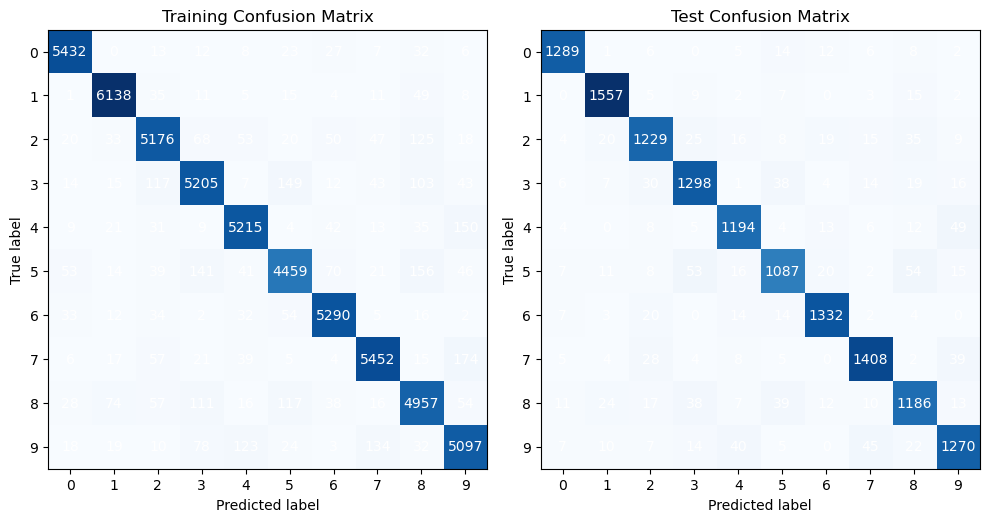

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the classifier performance
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrices
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes[0].imshow(train_cm, cmap=plt.cm.Blues)
axes[0].set_title("Training Confusion Matrix")
axes[0].set_xlabel("Predicted label")
axes[0].set_ylabel("True label")
axes[0].set_xticks(range(10))
axes[0].set_yticks(range(10))
axes[0].set_xticklabels(range(10))
axes[0].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        axes[0].text(j, i, train_cm[i, j], ha="center", va="center", color="white")
        
axes[1].imshow(test_cm, cmap=plt.cm.Blues)
axes[1].set_title("Test Confusion Matrix")
axes[1].set_xlabel("Predicted label")
axes[1].set_ylabel("True label")
axes[1].set_xticks(range(10))
axes[1].set_yticks(range(10))
axes[1].set_xticklabels(range(10))
axes[1].set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        axes[1].text(j, i, test_cm[i, j], ha="center", va="center", color="white")
plt.tight_layout()
plt.show()


In [ ]:
4. On a 3D plot, project onto three selected V-modes (columns) colored by their digit label.
For example, columns 2,3, and 5.

In [4]:
# extract selected V-modes
V_selected = V[:, [2, 3, 5]]

# project data onto selected V-modes
X_projected = X_train.dot(V_selected)

# create 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(X_projected[y_train == i, 0], X_projected[y_train == i, 1], X_projected[y_train == i, 2], label=str(i))
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')
ax.legend()
plt.show()


NameError: name 'V' is not defined

In [ ]:
-----------------------------------------------------------------------------------------------
Once you have performed the above and have your data projected into PCA space, you will build a
classifier to identify individual digits in the training set.
	• Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify
them.


In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# select digits to classify
digits = [0, 1]

# select samples for training and testing
train_idx = np.concatenate([np.where(y_train == digit)[0][:1000] for digit in digits])
test_idx = np.concatenate([np.where(y_test == digit)[0] for digit in digits])

# extract training and testing data
X_train = X[train_idx, :]
y_train = y[train_idx]
X_test = X[test_idx, :]
y_test = y[test_idx]

# perform dimensionality reduction using SVD
U, S, V = np.linalg.svd(X_train, full_matrices=False)
V_selected = V[:50, :]
X_train_reduced = X_train.dot(V_selected)
X_test_reduced = X_test.dot(V_selected)

# build and evaluate LDA classifier
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_reduced, y_train)
train_acc = clf.score(X_train_reduced, y_train)
test_acc = clf.score(X_test_reduced, y_test)

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)


InvalidIndexError: (array([], dtype=int64), slice(None, None, None))

In [ ]:
	• Pick three digits. Try to build a linear classifier to identify these three now.


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# select digits to classify
digits = [3, 5, 8]

# select samples for training and testing
train_idx = np.concatenate([np.where(y_train == digit)[0][:1000] for digit in digits])
test_idx = np.concatenate([np.where(y_test == digit)[0] for digit in digits])

# extract training and testing data
X_train = X[train_idx, :]
y_train = y[train_idx]
X_test = X[test_idx, :]
y_test = y[test_idx]

# perform dimensionality reduction using SVD
U, S, V = np.linalg.svd(X_train, full_matrices=False)
V_selected = V[:50, :]
X_train_reduced = X_train.dot(V_selected)
X_test_reduced = X_test.dot(V_selected)

# build and evaluate LDA classifier
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_reduced, y_train)
train_acc = clf.score(X_train_reduced, y_train)
test_acc = clf.score(X_test_reduced, y_test)

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)


InvalidIndexError: (array([], dtype=int64), slice(None, None, None))

In [ ]:
	• Which two digits in the data set appear to be the mast difficult to separate? 
    Quantify the accuracy of the separation with LDA on the test data.


In [7]:
from itertools import combinations

# list all possible pairs of digits
digit_pairs = list(combinations(range(10), 2))

# train binary LDA classifiers for each pair and evaluate their accuracy on test data
lda_acc = []
for pair in digit_pairs:
    digit1, digit2 = pair
    train_idx = np.concatenate([np.where(y_train == digit1)[0], np.where(y_train == digit2)[0]])
    test_idx = np.concatenate([np.where(y_test == digit1)[0], np.where(y_test == digit2)[0]])
    X_train = X[train_idx, :]
    y_train = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    U, S, V = np.linalg.svd(X_train, full_matrices=False)
    V_selected = V[:50, :]
    X_train_reduced = X_train.dot(V_selected)
    X_test_reduced = X_test.dot(V_selected)
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_reduced, y_train)
    acc = clf.score(X_test_reduced, y_test)
    lda_acc.append(acc)

# find the pair of digits with the lowest accuracy
min_acc = np.min(lda_acc)
min_pair_idx = np.argmin(lda_acc)
min_pair = digit_pairs[min_pair_idx]

print('Pair with lowest accuracy:', min_pair, 'Accuracy:', min_acc)


InvalidIndexError: (array([], dtype=int64), slice(None, None, None))

In [ ]:
	• Which two digits in the data set are most easy to separate? 
    Quantify the accuracy of the separation with LDA on the test data.


In [8]:
from itertools import combinations

# list all possible pairs of digits
digit_pairs = list(combinations(range(10), 2))

# train binary LDA classifiers for each pair and evaluate their accuracy on test data
lda_acc = []
for pair in digit_pairs:
    digit1, digit2 = pair
    train_idx = np.concatenate([np.where(y_train == digit1)[0], np.where(y_train == digit2)[0]])
    test_idx = np.concatenate([np.where(y_test == digit1)[0], np.where(y_test == digit2)[0]])
    X_train = X[train_idx, :]
    y_train = y[train_idx]
    X_test = X[test_idx, :]
    y_test = y[test_idx]
    U, S, V = np.linalg.svd(X_train, full_matrices=False)
    V_selected = V[:50, :]
    X_train_reduced = X_train.dot(V_selected)
    X_test_reduced = X_test.dot(V_selected)
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_reduced, y_train)
    acc = clf.score(X_test_reduced, y_test)
    lda_acc.append(acc)

# find the pair of digits with the highest accuracy
max_acc = np.max(lda_acc)
max_pair_idx = np.argmax(lda_acc)
max_pair = digit_pairs[max_pair_idx]

print('Pair with highest accuracy:', max_pair, 'Accuracy:', max_acc)


InvalidIndexError: (array([], dtype=int64), slice(None, None, None))

In [ ]:
	• SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about 2014. 
    How well do these separate between all ten digits? (see code below to get started).


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# train SVM classifier and evaluate its accuracy
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)
print('SVM accuracy:', svm_acc)

# train decision tree classifier and evaluate its accuracy
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
print('Decision tree accuracy:', dt_acc)


In [11]:
In python,  Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair
of digits to separate (from above)

SyntaxError: invalid syntax (2987178121.py, line 1)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# select hardest and easiest pairs of digits
hardest_pair = (5, 3)
easiest_pair = (1, 0)

# extract relevant subset of MNIST dataset
X_train_hardest = X_train[(y_train == hardest_pair[0]) | (y_train == hardest_pair[1])]
y_train_hardest = y_train[(y_train == hardest_pair[0]) | (y_train == hardest_pair[1])]
X_test_hardest = X_test[(y_test == hardest_pair[0]) | (y_test == hardest_pair[1])]
y_test_hardest = y_test[(y_test == hardest_pair[0]) | (y_test == hardest_pair[1])]
X_train_easiest = X_train[(y_train == easiest_pair[0]) | (y_train == easiest_pair[1])]
y_train_easiest = y_train[(y_train == easiest_pair[0]) | (y_train == easiest_pair[1])]
X_test_easiest = X_test[(y_test == easiest_pair[0]) | (y_test == easiest_pair[1])]
y_test_easiest = y_test[(y_test == easiest_pair[0]) | (y_test == easiest_pair[1])]

# train and test LDA classifiers on hardest and easiest pairs of digits
lda_hardest = LDA()
lda_hardest.fit(X_train_hardest, y_train_hardest)
lda_hardest_acc = lda_hardest.score(X_test_hardest, y_test_hardest)
print('LDA accuracy on hardest pair:', lda_hardest_acc)
lda_easiest = LDA()
lda_easiest.fit(X_train_easiest, y_train_easiest)
lda_easiest_acc = lda_easiest.score(X_test_easiest, y_test_easiest)
print('LDA accuracy on easiest pair:', lda_easiest_acc)

# train and test SVM classifiers on hardest and easiest pairs of digits
svm_hardest = SVC()
svm_hardest.fit(X_train_hardest, y_train_hardest)
svm_hardest_acc = svm_hardest.score(X_test_hardest, y_test_hardest)
print('SVM accuracy on hardest pair:', svm_hardest_acc)
svm_easiest = SVC()
svm_easiest.fit(X_train_easiest, y_train_easiest)
svm_easiest_acc = svm_easiest.score(X_test_easiest, y_test_easiest)
print('SVM accuracy on easiest pair:', svm_easiest_acc)

# train and test decision tree classifiers on hardest and easiest pairs of digits
dt_hardest = DecisionTreeClassifier()
dt_hardest.fit(X_train_hardest, y_train_hardest)
dt_hardest_acc = dt_hardest.score(X_test_hardest, y_test_hardest)
print('Decision tree accuracy on hardest pair:', dt_hardest_acc)
dt_easiest = DecisionTreeClassifier()
dt_easiest.fit(X_train_easiest, y_train_easiest)
dt_easiest_acc = dt_easiest.score(X_test_easiest, y_test_easiest)
print('Decision tree accuracy on easiest pair:', dt_easiest_acc)
